In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [66]:
df = pd.read_csv('weatherAUS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [67]:
#добавляем новые колонки связанные с датой
df.Date = pd.to_datetime(df.Date)

def date_features(df):
    df["year"] = df.Date.apply(lambda s: s.year)
    df["quarter"] = df.Date.apply(lambda s: s.quarter)
    df["month"] = df.Date.apply(lambda s: s.month)
    #df["week"] = df.date.apply(lambda s: s.week)
    df["day"] = df.Date.apply(lambda s: s.day)
    #df["dayofweek"] = df.date.apply(lambda s: s.dayofweek)  
    return df

df = date_features(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 28 columns):
Date             142193 non-null datetime64[ns]
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-n

In [68]:
df.drop(['Date'], axis='columns', inplace=True)

In [69]:
df.Location.unique(), df.WindGustDir.unique(), df.WindDir3pm.unique(), df.WindDir9am.unique(), df.RainToday.unique(), df.RainTomorrow.unique()

(array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
        'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
        'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
        'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
        'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
        'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
        'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
        'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
        'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
        'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object),
 array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
        'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object),
 array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
        'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object),
 array(['W

In [70]:
d1 = {'W':0, 'WNW':1, 'WSW':2, 'NE':3, 'NNW':4, 'N':5, 'NNE':6, 'SW':7, 'ENE':8, 'SSE':9, 'S':10, 
      'NW':11, 'SE':12, 'ESE':13, 'E':14, 'SSW':15}
df['WindGustDir'] = df['WindGustDir'].map(d1)
d2 = {'W':0, 'WNW':1, 'WSW':2, 'NE':3, 'NNW':4, 'N':5, 'NNE':6, 'SW':7, 'ENE':8, 'SSE':9, 'S':10, 
      'NW':11, 'SE':12, 'ESE':13, 'E':14, 'SSW':15}
df['WindDir3pm'] = df['WindDir3pm'].map(d2)
d3 = {'W':0, 'WNW':1, 'WSW':2, 'NE':3, 'NNW':4, 'N':5, 'NNE':6, 'SW':7, 'ENE':8, 'SSE':9, 'S':10, 
      'NW':11, 'SE':12, 'ESE':13, 'E':14, 'SSW':15}
df['WindDir9am'] = df['WindDir9am'].map(d3)
d4 = {'No':0, 'Yes':1}
df['RainToday'] = df['RainToday'].map(d4)
d5 = {'No':0, 'Yes':1}
df['RainTomorrow'] = df['RainTomorrow'].map(d5)

df.Location.unique(), df.WindGustDir.unique(), df.WindDir3pm.unique(), df.WindDir9am.unique(), df.RainToday.unique(), df.RainTomorrow.unique()

(array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
        'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
        'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
        'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
        'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
        'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
        'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
        'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
        'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
        'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., nan, 14., 15.]),
 array([ 1.,  2., 14., 11.,  0.,  9., 13.,  8.,  4., 15.,  7., 12.,  5.,
        10.,  6., nan,  3.]),
 array([ 0.,  4., 12.,  8.,  7.,  9., 10.,  3., nan, 15.,  5.,  2., 13.,
     

In [71]:
df['WindGustDir'].fillna(16, inplace=True)
df['WindDir3pm'].fillna(16, inplace=True)
df['WindDir9am'].fillna(16, inplace=True)
df['RainToday'].fillna(2, inplace=True)
df.Location.unique(), df.WindGustDir.unique(), df.WindDir3pm.unique(), df.WindDir9am.unique(), df.RainToday.unique(), df.RainTomorrow.unique()

(array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
        'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
        'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
        'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
        'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
        'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
        'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
        'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
        'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
        'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 16., 14., 15.]),
 array([ 1.,  2., 14., 11.,  0.,  9., 13.,  8.,  4., 15.,  7., 12.,  5.,
        10.,  6., 16.,  3.]),
 array([ 0.,  4., 12.,  8.,  7.,  9., 10.,  3., 16., 15.,  5.,  2., 13.,
     

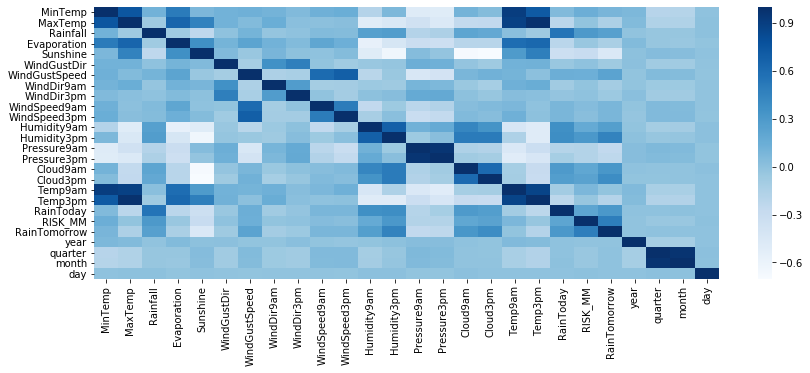

In [72]:
#Тепловая карта
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize= (14,5))
sns.heatmap(df.dropna().corr(), cmap = 'Blues')

In [73]:
df.drop(['Location', 'Sunshine', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'WindDir9am', 'Evaporation'], axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 20 columns):
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
WindGustDir      142193 non-null float64
WindGustSpeed    132923 non-null float64
WindDir3pm       142193 non-null float64
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
RainToday        142193 non-null float64
RISK_MM          142193 non-null float64
RainTomorrow     142193 non-null int64
year             142193 non-null int64
quarter          142193 non-null int64
month            142193 non-null int64
day              142193 non-null int64
dtypes: float64(15), int64(5)
memory usage: 21.7 MB


In [74]:
#изменение размера занимаемой памяти
df = df.astype('float32')

df['RainToday'] = df['RainToday'].astype('int32')
df['RainTomorrow'] = df['RainTomorrow'].astype('int32')
df['year'] = df['year'].astype('int32')
df['quarter'] = df['quarter'].astype('int32')
df['month'] = df['month'].astype('int32')
df['day'] = df['day'].astype('int32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 20 columns):
MinTemp          141556 non-null float32
MaxTemp          141871 non-null float32
Rainfall         140787 non-null float32
WindGustDir      142193 non-null float32
WindGustSpeed    132923 non-null float32
WindDir3pm       142193 non-null float32
WindSpeed9am     140845 non-null float32
WindSpeed3pm     139563 non-null float32
Humidity9am      140419 non-null float32
Humidity3pm      138583 non-null float32
Cloud9am         88536 non-null float32
Cloud3pm         85099 non-null float32
Temp9am          141289 non-null float32
RainToday        142193 non-null int32
RISK_MM          142193 non-null float32
RainTomorrow     142193 non-null int32
year             142193 non-null int32
quarter          142193 non-null int32
month            142193 non-null int32
day              142193 non-null int32
dtypes: float32(14), int32(6)
memory usage: 10.8 MB


In [84]:
df.dropna(subset = ['Cloud3pm', 'Cloud9am'], inplace=True)

In [93]:
df.dropna(inplace=True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74097 entries, 4 to 142192
Data columns (total 20 columns):
MinTemp          74097 non-null float32
MaxTemp          74097 non-null float32
Rainfall         74097 non-null float32
WindGustDir      74097 non-null float32
WindGustSpeed    74097 non-null float32
WindDir3pm       74097 non-null float32
WindSpeed9am     74097 non-null float32
WindSpeed3pm     74097 non-null float32
Humidity9am      74097 non-null float32
Humidity3pm      74097 non-null float32
Cloud9am         74097 non-null float32
Cloud3pm         74097 non-null float32
Temp9am          74097 non-null float32
RainToday        74097 non-null int32
RISK_MM          74097 non-null float32
RainTomorrow     74097 non-null int32
year             74097 non-null int32
quarter          74097 non-null int32
month            74097 non-null int32
day              74097 non-null int32
dtypes: float32(14), int32(6)
memory usage: 6.2 MB


In [95]:
df = df[:5000][:]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 4 to 10561
Data columns (total 20 columns):
MinTemp          5000 non-null float32
MaxTemp          5000 non-null float32
Rainfall         5000 non-null float32
WindGustDir      5000 non-null float32
WindGustSpeed    5000 non-null float32
WindDir3pm       5000 non-null float32
WindSpeed9am     5000 non-null float32
WindSpeed3pm     5000 non-null float32
Humidity9am      5000 non-null float32
Humidity3pm      5000 non-null float32
Cloud9am         5000 non-null float32
Cloud3pm         5000 non-null float32
Temp9am          5000 non-null float32
RainToday        5000 non-null int32
RISK_MM          5000 non-null float32
RainTomorrow     5000 non-null int32
year             5000 non-null int32
quarter          5000 non-null int32
month            5000 non-null int32
day              5000 non-null int32
dtypes: float32(14), int32(6)
memory usage: 429.7 KB


In [96]:
df.to_csv('newRain.csv')